<h1> GRIP-TSF-Task 1: Prediction using Supervised Machine Learning </h1>

In this task,we have to predict the percentage of marks that a student is expected to score based on the number of hours they studied.

In [2]:
#importing the suitable libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset with the help of url
url = "http://bit.ly/w-data"
df=pd.read_csv(url)

In [4]:
#prints the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#to get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#to calculate the statistical functions
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


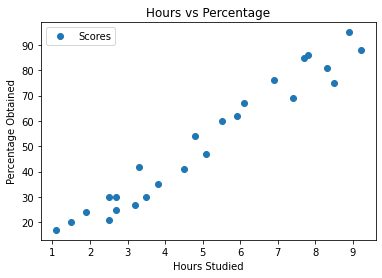

In [7]:
#to plot the data on 2d graph to get the relation among the two values
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Obtained')  
plt.show()

<h1> Data Analysis </h1>

In [8]:
#variable 'x' contains the list of number of hours studied and variable 'y' contains the list of scores obtained. 
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [9]:
#printng an array x
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
#printing an array y
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
#dividing the data into training and test se
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

<h2> Training the Algorithm </h2>

In [12]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [13]:
#The attribute 'coef_' computes the coefficients of the features in the decision function
regressor.coef_

array([9.91065648])

In [14]:
#The attribute 'intercept_' is to represents the constant(bias), added to the decision function.
regressor.intercept_

2.018160041434683

In [15]:
#Checking the percentage of correct predictions for the test data.
print("Accuracy : ",regressor.score(x_test, y_test)*100)

Accuracy :  94.54906892105356


<h2> Plotting Regression Line </h2>

In [16]:
line = regressor.coef_*x+regressor.intercept_

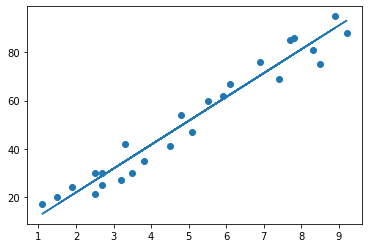

In [17]:
plt.scatter(x, y)
plt.plot(x, line);
plt.show()


<h2> Making Prediction </h2>

In [18]:
#Predicting the scores using our trained algorithm
#The predict() method will predict the label of a new set of data(given a trained model).
y_prediction = regressor.predict(x_test)
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
# compare actual and predicted data
actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})  
actual


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<h2> What will be predicted score if a student studies for 9.25 hrs/ day?</h2>

In [23]:
hours = 9.25
predicted = regressor.coef_*hours+regressor.intercept_
print("No of Hours = ",hours)
print("Score = ",predicted[0])
y_predict=regressor.predict([[hours]])
print("Predicted Score if a student studied for 9.25 hours per day:",y_predict[0])

No of Hours =  9.25
Score =  93.69173248737538
Predicted Score if a student studied for 9.25 hours per day: 93.69173248737538


<h2> Model Evaluation</h2>
Our final step is to evaluate the performance of trained model. This step is to check how well is the model working with this dataset.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_prediction,y_test)
mse=mean_squared_error(y_prediction,y_test)
r_score=r2_score(y_prediction,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-Squared: 0.9546785947197246
